In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
import matplotlib.pyplot as plt

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

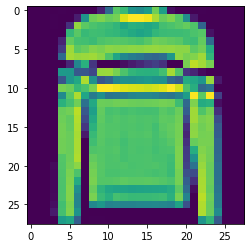

In [10]:
plt.imshow(x_train[5])

In [11]:
x_train.max()

255

In [12]:
x_train.min()

0

In [13]:
x_train = x_train/255

In [14]:
x_test = x_test/255

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_test.shape

(10000, 28, 28)

In [20]:
x_train = x_train.reshape(60000,28,28,1)

In [21]:
x_test = x_test.reshape(10000,28,28,1)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
y_cat_train = to_categorical(y_train)

In [25]:
y_cat_test = to_categorical(y_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [27]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [38]:
model.fit(x_train,y_cat_train,validation_data=[x_test,y_cat_test],epochs=10,callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0925 - accuracy: 0.9683 - val_loss: 0.5109 - val_accuracy: 0.9016
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0892 - accuracy: 0.9688 - val_loss: 0.4678 - val_accuracy: 0.8980
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0867 - accuracy: 0.9706 - val_loss: 0.4636 - val_accuracy: 0.9029
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0821 - accuracy: 0.9728 - val_loss: 0.5247 - val_accuracy: 0.9021


In [49]:
import pandas as pd

In [50]:
import numpy as np

In [41]:
losses= pd.DataFrame(model.history.history)

In [42]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.092480,0.968300,0.510948,0.9016
1,0.089206,0.968817,0.467819,0.8980
2,0.086682,0.970567,0.463609,0.9029
3,0.082093,0.972817,0.524701,0.9021


In [62]:
# losses.plot()

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5247 - accuracy: 0.9021


[0.5247009992599487, 0.9021000266075134]

In [46]:
from sklearn.metrics import classification_report

In [47]:
preds_prob = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [51]:
predictions = np.argmax(preds_prob, axis=1)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.84      0.85      1000
           3       0.89      0.92      0.90      1000
           4       0.83      0.88      0.86      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.76      0.75      1000
           7       0.98      0.92      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [53]:
predictions[4]

6

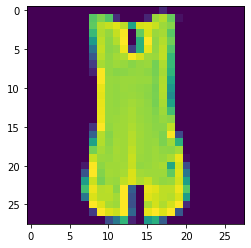

In [59]:
plt.imshow(x_train[4])

In [63]:
# losses[['loss','val_loss']].plot()